# TALLER 02 Cálculo de erores
## Integrantes:
## - Christian Ayala
## - Jhonn Saeteros

Raíces encontradas con método de Newton:
-151.99999999998278
-125.99999995221714


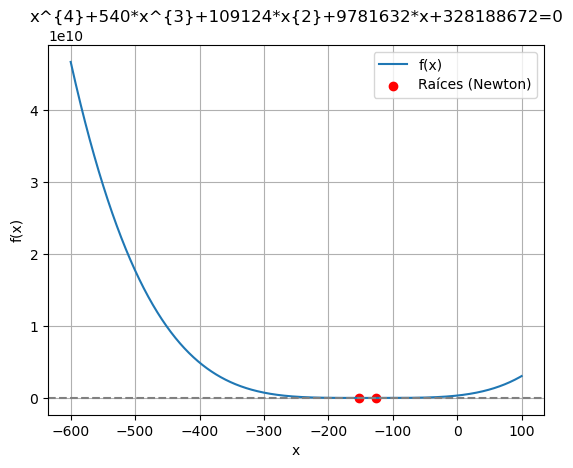

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# Definición del polinomio y su derivada
def f(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

def f_prime(x):
    return 4*x**3 + 3*540*x**2 + 2*109124*x + 9781632

# Intentos con distintos valores iniciales para encontrar múltiples raíces
valores_iniciales = [-500, -200, -100, -50, -10, 0, 10]

#valores_iniciales = [1, 540, 109124, 9781632, 328188672]
raices = []

for x0 in valores_iniciales:
    try:
        raiz = newton(f, x0, fprime=f_prime)
        # Añadir raíz si no está ya en la lista (evitar duplicados con tolerancia)
        if not any(np.isclose(raiz, r, atol=1e-6) for r in raices):
            raices.append(raiz)
    except RuntimeError:
        pass  # Si no converge, continuar con el siguiente valor

# Mostrar raíces encontradas
print("Raíces encontradas con método de Newton:")
for r in raices:
    print(r)

# Graficar el polinomio
x = np.linspace(-600, 100, 1000)
y = f(x)

plt.plot(x, y, label='f(x)')
plt.axhline(0, color='gray', linestyle='--')
plt.scatter(raices, [f(r) for r in raices], color='red', label='Raíces (Newton)')
plt.title('x^{4}+540*x^{3}+109124*x{2}+9781632*x+328188672=0')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
